In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pathlib import Path
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
# Path to the file
file_path = Path("KolayGelsin-Call-Center-Data.xlsx")            #change this 


#data formatting
def remove_0(date_str):
    sum_str = ""
    listo = date_str.split("\n")
    
    for i in range(len(listo)):
        if "00:00:00" in listo[i]:
            listo[i] = listo[i][8:10] +"/" + listo[i][5:7] +"/" +listo[i][0:4]
    return "\n".join(listo)

# Load the data
try:
    # Attempt to read the Excel file
    data = pd.read_excel(file_path, sheet_name="TARİH SAAT YOĞUNLUKLARI")
    #print(data.tail())
    # Correct the date format
    data['Date'] = data['Date'].astype(str).apply(remove_0)
    data['DateTime'] =  pd.to_datetime(data['Date'].astype(str) + ' ' + data["Hour Def"].str.split('-').str[0].str.strip())
    #print(data['DateTime'])
    data_sorted = data.sort_values(by='DateTime')
    #print(data_sorted)
    # Convert date column to datetime
    data['DateTime'] = pd.to_datetime(data['DateTime'][:], format='%m/%d/%Y ') 
    
    #removing non-working hours
    data_filtered = data_sorted[~data_sorted['Hour Def'].str.contains("08:00 - 9:00")]
    data_filtered = data_filtered[~data_sorted['Hour Def'].str.contains("00:00 - 1:00")]
    data_filtered = data_filtered[~data_sorted['Hour Def'].str.contains("22:00 - 23:00")]
    #print(data_filtered)
     
    # Display the result
    #print(hour_counts_per_date)
except Exception as e:
    print(e)

<ipython-input-26-b6cfbbbc82bb>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered = data_filtered[~data_sorted['Hour Def'].str.contains("00:00 - 1:00")]
<ipython-input-26-b6cfbbbc82bb>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered = data_filtered[~data_sorted['Hour Def'].str.contains("22:00 - 23:00")]


In [3]:
#Eğer mevcut olan bir günde eksik bir saat varsa onu yazdırıyor
df = pd.DataFrame(data_filtered)
all_hours = pd.date_range('09:00:00', '21:00:00', freq='1H').time

dict_of_missing = {}
# Eksik saatleri kontrol et ve yazdır
for date in df['DateTime'].dt.date.unique():
    missing_hours = set(all_hours) - set(df[df['DateTime'].dt.date == date]['DateTime'].dt.time)
    if missing_hours:
        #print(f"Tarih: {date}, Eksik Saatler: {sorted(list(missing_hours))}\n")  
        dict_of_missing[date] = missing_hours

In [4]:
#Eğer mevcut olan bir günde eksik bir saat varsa onu geçen hafta aynı saatle değiştiriyor.
for i in dict_of_missing:
    for j in dict_of_missing[i]:
        filtered_row = data_filtered[data_filtered["DateTime"] == pd.to_datetime(str(i - timedelta(days=6)) + " " + str(j))]
        new_datetime = pd.to_datetime(str(i) + " " + str(j))
        filtered_row = filtered_row.copy()  # Create a copy to avoid SettingWithCopyWarning
        filtered_row.loc[:, "DateTime"] = new_datetime
        data_filtered = pd.concat([data_filtered, filtered_row], ignore_index=True)                          

In [5]:
#Eğer mevcut olan bir günde eksik bir saat varsa onu yazdırıyor
df = pd.DataFrame(data_filtered)
all_hours = pd.date_range('09:00:00', '21:00:00', freq='1H').time

dict_of_missing = {}
# Eksik saatleri kontrol et ve yazdır
for date in df['DateTime'].dt.date.unique():
    missing_hours = set(all_hours) - set(df[df['DateTime'].dt.date == date]['DateTime'].dt.time)
    if missing_hours:
        print(f"Tarih: {date}, Eksik Saatler: {sorted(list(missing_hours))}\n")
        dict_of_missing[date] = missing_hours

In [6]:
#DateTime Değerine göre sıralıyor.
data_filtered = data_filtered.sort_values(by='DateTime')

In [7]:
#data_filtered[:3042]

In [8]:
#düzenlenmiş datanın son hali
data_filtered

,Date,Hour Def,Gelen Çağrı,Cevaplanan,Kaçan Çağrı,Kısa Çağrı,Net Kaçan,AR %,SL %,AHT,30 Sn İçerisinde Kaçan Adet,SL İçerisinde Yanıtlanan,Konuşma Süresi dk.,Ort. Cevaplanma Hızı Sn.,MAX. Bekleme Süresi Sn.,DateTime
0,01/02/2023,09:00 - 10:00,278,276.0,2.0,2.0,0.0,%99.28,%99.64,164.7,2.0,275.0,758.0,5.690,38.0,2023-01-02 09:00:00
1,01/02/2023,10:00 - 11:00,374,367.0,7.0,7.0,0.0,%98.13,%99.46,156.1,7.0,365.0,955.0,45.052,29.0,2023-01-02 10:00:00
2,01/02/2023,11:00 - 12:00,349,343.0,6.0,6.0,0.0,%98.28,%99.71,154.9,6.0,342.0,885.0,5.800,24.0,2023-01-02 11:00:00
3,01/02/2023,12:00 - 13:00,298,295.0,3.0,3.0,0.0,%98.99,%99.66,176.3,3.0,294.0,867.0,5.800,22.0,2023-01-02 12:00:00
4,01/02/2023,13:00 - 14:00,236,235.0,1.0,1.0,0.0,%99.58,%99.57,178.0,1.0,234.0,697.0,5.780,24.0,2023-01-02 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502,11/11/2023,17:00 - 18:00,109,105.0,4.0,4.0,0.0,%96.33,%100.00,204.7,4.0,105.0,358.3,5.720,8.0,2023-11-11 17:00:00
3503,11/11/2023,18:00 - 19:00,74,73.0,1.0,1.0,0.0,%98.65,%100.00,210.8,1.0,73.0,256.4,5.700,11.0,2023-11-11 18:00:00
3504,11/11/2023,19:00 - 20:00,58,57.0,1.0,1.0,0.0,%98.28,%100.00,226.5,1.0,57.0,215.2,5.760,7.0,2023-11-11 19:00:00
3505,11/11/2023,20:00 - 21:00,46,46.0,NaN,NaN,NaN,%100.00,%100.00,188.0,NaN,46.0,144.1,5.930,9.0,2023-11-11 20:00:00


In [9]:
ortalama_AHT = df['AHT'].mean()
ortalama_AHT #Average Handle Time

171.75057471264373

In [10]:
baslangic_tarihi = pd.to_datetime('2023-10-23')
bitis_tarihi = pd.to_datetime('2023-10-29')

filtre = (df['DateTime'] >= baslangic_tarihi) & (df['DateTime'] < bitis_tarihi)
ekim_23_28_general = df[filtre]


ekim_23_28_AHT = ekim_23_28_general['AHT'].mean()


ekim_23_28 = list(df[filtre]["Gelen Çağrı"])

In [11]:
#ekim_2_7_AHT

In [12]:
#list(ekim_23_28_general["AR %"])

In [13]:
#list(ekim_23_28_general["SL %"])

# Forecast

In [14]:
# Use only data for the first 9 months to forecast hourly calls for the 10th month

#ekimin 4. haftası
ekim23_index = 3042 + 78*3
data_filtered = data_filtered.sort_values(by='DateTime')
first_nine_months = data_filtered[:ekim23_index]
calls = first_nine_months.to_numpy()[:,2]

# First 80% of the data is training data and last 20% of the data is test data

calls_train = np.array(calls[:round(len(calls)*0.8)]).astype(int)
calls_test = np.array(calls[round(len(calls)*0.8):]).astype(int)

In [15]:
# Actual number of calls observed at the first week of October (2nd October - 7th October)

october_23to28_actual = data_filtered[ekim23_index:ekim23_index+78].to_numpy()[:,2]

In [16]:
# ARIMA Train Data

arima_mod_train = sm.tsa.arima.ARIMA(calls_train, order=(1, 1, 0))

res_arima_train = arima_mod_train.fit()
print(res_arima_train.summary())

arima_train_pred = res_arima_train.predict()

mse_arima_train = np.mean(np.square(res_arima_train.resid))
rmse_arima_train = np.sqrt(mse_arima_train)
mae_arima_train = np.mean(np.abs(res_arima_train.resid))
mape_arima_train = np.mean(np.abs(res_arima_train.resid) / calls_train)

print('MSE ARIMA TRAIN = ', mse_arima_train)
print('RMSE ARIMA TRAIN = ', rmse_arima_train)
print('MAE ARIMA TRAIN = ', mae_arima_train)
print('MAPE ARIMA TRAIN = ', mape_arima_train)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2621
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -15882.234
Date:                Fri, 19 Jan 2024   AIC                          31768.468
Time:                        19:17:52   BIC                          31780.210
Sample:                             0   HQIC                         31772.721
                               - 2621                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2141      0.018     11.681      0.000       0.178       0.250
sigma2      1.079e+04    162.078     66.549      0.000    1.05e+04    1.11e+04
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [17]:
# ARIMA Test Data

arima_mod_test = sm.tsa.arima.ARIMA(calls_test, order=(1, 1, 0))

res_arima_test = arima_mod_test.filter(res_arima_train.params)
print(res_arima_test.summary())

arima_test_pred = res_arima_test.predict()

mse_arima_test = np.mean(np.square(res_arima_test.resid))
rmse_arima_test = np.sqrt(mse_arima_test)
mae_arima_test = np.mean(np.abs(res_arima_test.resid))
mape_arima_test = np.mean(np.abs(res_arima_test.resid) / calls_test)

print('MSE ARIMA TEST = ', mse_arima_test)
print('RMSE ARIMA TEST = ', rmse_arima_test)
print('MAE ARIMA TEST = ', mae_arima_test)
print('MAPE ARIMA TEST = ', mape_arima_test)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  655
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4019.831
Date:                Fri, 19 Jan 2024   AIC                           8043.663
Time:                        19:17:52   BIC                           8052.629
Sample:                             0   HQIC                          8047.140
                                - 655                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2141      0.047      4.535      0.000       0.122       0.307
sigma2      1.079e+04    343.177     31.430      0.000    1.01e+04    1.15e+04
Ljung-Box (L1) (Q):                   4.90   Jarque-

In [18]:
# SARIMA Train Data

sarima_mod_train = sm.tsa.statespace.SARIMAX(calls_train, trend='c', 
                                             order=(1,1,0),
                                             seasonal_order=(1,0,0,78))

res_sarima_train = sarima_mod_train.fit()
print(res_sarima_train.summary())

x_train_pred = res_sarima_train.get_prediction()

mse_x_train = np.mean(np.square(res_sarima_train.resid))
rmse_x_train = np.sqrt(mse_x_train)
mae_x_train = np.mean(np.abs(res_sarima_train.resid))
mape_x_train = np.mean(np.abs(res_sarima_train.resid) / (calls_train))

print('MSE SARIMA TRAIN = ', mse_x_train)
print('RMSE SARIMA TRAIN = ', rmse_x_train)
print('MAE SARIMA TRAIN = ', mae_x_train)
print('MAPE SARIMA TRAIN = ', mape_x_train)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2621
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 78)   Log Likelihood              -14689.522
Date:                            Fri, 19 Jan 2024   AIC                          29387.044
Time:                                    19:18:40   BIC                          29410.528
Sample:                                         0   HQIC                         29395.550
                                           - 2621                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0021      1.248     -0.002      0.999      -2.448       2.444
ar.L1         -0.1358      0.009   

In [19]:
# SARIMA Test Data

sarima_mod_test = sm.tsa.statespace.SARIMAX(calls_test, trend='c', 
                                            order=(1,1,0),
                                            seasonal_order=(1,0,0,78))

res_sarima_test = sarima_mod_test.filter(res_sarima_train.params)
print(res_sarima_test.summary())

x_test_pred = res_sarima_test.get_prediction()

mse_x_test = np.mean(np.square(res_sarima_test.resid))
rmse_x_test = np.sqrt(mse_x_test)
mae_x_test = np.mean(np.abs(res_sarima_test.resid))
mape_x_test = np.mean(np.abs(res_sarima_test.resid) / (calls_test))

print('MSE SARIMA TEST = ', mse_x_test)
print('RMSE SARIMA TEST = ', rmse_x_test)
print('MAE SARIMA TEST = ', mae_x_test)
print('MAPE SARIMA TEST = ', mape_x_test)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  655
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 78)   Log Likelihood               -3629.285
Date:                            Fri, 19 Jan 2024   AIC                           7266.570
Time:                                    19:18:42   BIC                           7284.502
Sample:                                         0   HQIC                          7273.524
                                            - 655                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0021      2.390     -0.001      0.999      -4.687       4.683
ar.L1         -0.1358      0.048   

In [20]:
# Use this variable as input for the Erlang formula in the optimization model

forecastx = res_sarima_test.forecast(78)
forecastx

array([350.10087433, 449.55242091, 574.88068191, 605.60485754,
       599.94300004, 530.40336418, 641.98551558, 646.83518554,
       544.95237416, 371.10599581, 287.01193132, 198.06639041,
       126.90959639, 329.86122037, 430.12326003, 643.58641627,
       562.7266694 , 579.70503043, 610.42924133, 628.21618176,
       521.48189396, 443.85646471, 338.73933571, 236.04794493,
       166.50830972,  92.92577748, 371.88386546, 470.5287463 ,
       635.47713829, 584.53482938, 585.34160232, 514.1848083 ,
       584.52941001, 582.91044474, 464.04746588, 305.56409621,
       181.84964092, 130.907332  , 146.26853422, 384.79765199,
       554.5975204 , 707.41722133, 596.6400365 , 570.76368911,
       515.77848318, 586.12308488, 558.62957868, 400.14620901,
       352.43821771, 280.47284429, 213.35894729, 159.18232075,
       437.33182932, 522.2308603 , 565.89234167, 544.8674707 ,
       671.8126307 , 581.24993098, 628.14572996, 553.75461832,
       431.65732184, 299.0484931 , 215.76300802, 156.73

In [21]:
result = res_sarima_test.get_forecast(78).summary_frame()
result

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,350.100874,64.842971,223.010986,477.190763
1,449.552421,85.703168,281.577298,617.527544
2,574.880682,103.057473,372.891746,776.869618
3,605.604858,117.805364,374.710587,836.499128
4,599.943000,130.911726,343.360732,856.525268
...,...,...,...,...
73,222.211772,491.977289,-742.045995,1186.469539
74,155.906455,495.278839,-814.822232,1126.635141
75,100.921249,498.558526,-876.235506,1078.078003
76,67.767687,501.816778,-915.775126,1051.310499


Text(0, 0.5, 'Number of Calls')

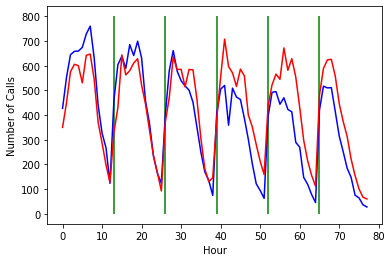

In [22]:
plt.plot(october_23to28_actual, color = 'b', label='Actual Call')
plt.plot(forecastx, color = 'r', label='Forcasted Call')
plt.vlines(x = [13,26,39,52,65], ymin = 0, ymax = 800, color = 'g' , label='Day Seperator')

plt.xlabel('Hour')
plt.ylabel('Number of Calls')

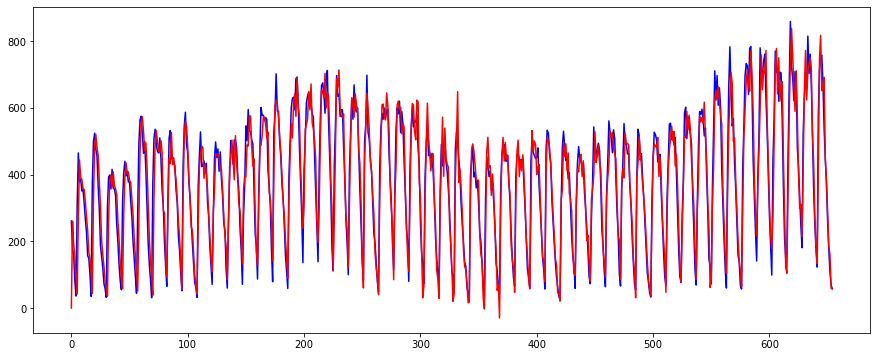

In [23]:
# Compare the plots of actual number of calls (blue) and SARIMA model predictions (red) on the test set
#koyma hiç bir yere
plt.figure(figsize=(15, 6))
plt.plot(calls_test, color='b')
plt.plot(res_sarima_test.fittedvalues, color='r')

In [24]:
#data_filtered[]